 Dataset loaded successfully!

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

 Missing Values:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

 Summary Statistics:
        Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000 

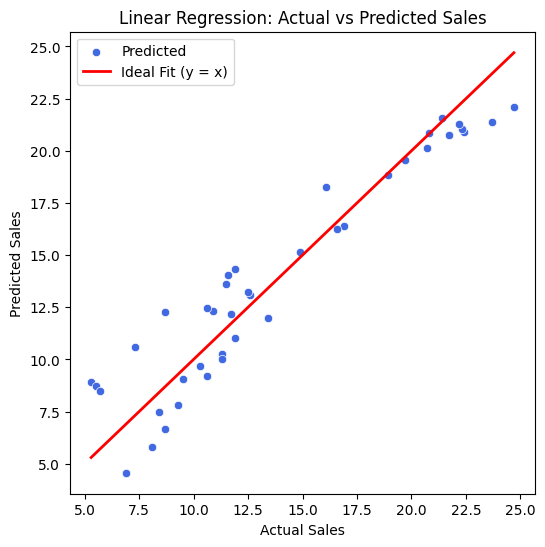

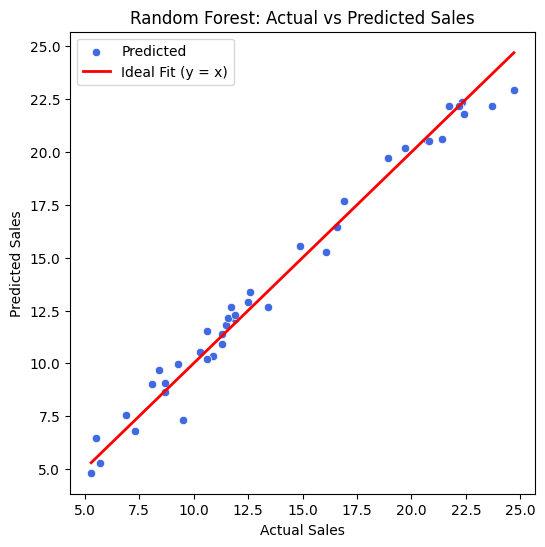

/tmp/ipython-input-1619373921.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=comparison, palette='Set2')


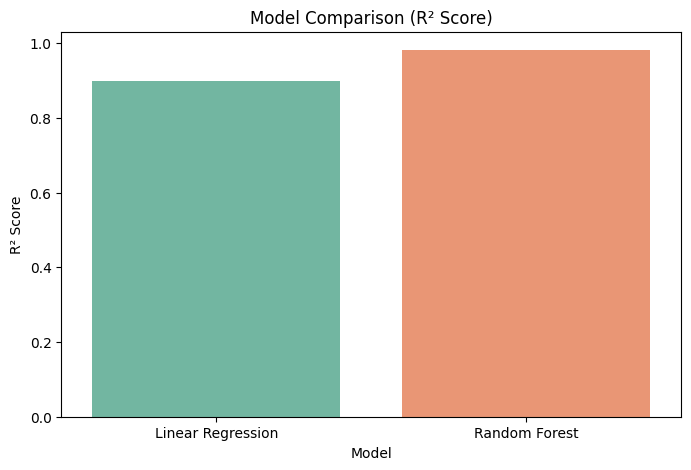

In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Step 1: Load Dataset
df = pd.read_csv("Advertising.csv")
print(" Dataset loaded successfully!\n")
print(df.head())

# Step 2: Explore Dataset
print("\n Dataset Info:")
print(df.info())

print("\n Missing Values:\n", df.isnull().sum())
print("\n Summary Statistics:\n", df.describe())

# Step 3: Data Preparation
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n Data Split Complete!")
print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")

# Step 4: Train Linear Regression Model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predict using Linear Regression
y_pred_lin = lin_model.predict(X_test)

# Evaluate Linear Regression
r2_lin = r2_score(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)

# Step 5: Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Step 6: Compare Models
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2 Score': [r2_lin, r2_rf],
    'MAE': [mae_lin, mae_rf],
    'RMSE': [rmse_lin, rmse_rf]
})

print("\n Model Performance Comparison:\n")
print(comparison)

# Step 7: Visualization

# Plot Actual vs Predicted (Linear Regression)
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_lin, color="royalBlue", label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", lw=2,  label="Ideal Fit (y = x)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted Sales")
plt.legend()
plt.show()

# Plot Actual vs Predicted (Random Forest)
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color="royalBlue", label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", lw=2,  label="Ideal Fit (y = x)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs Predicted Sales")
plt.legend()
plt.show()

# Model Comparison Bar Chart
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R2 Score', data=comparison, palette='Set2')
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.show()
